In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
RANDOM_SEED = 0
VALIDATE_SIZE = 0.2

# Data loading

In [3]:
import pickle as pkl

# Data loading
df_head = pd.read_csv('../data/creditcard_2023_head.csv')

# Loading first setup
with open('../data/setup_1.pkl', 'rb') as f:
    setup1 = pkl.load(f)

X_train, _, X_test, y_test = setup1['X_train'], setup1['y_train'], setup1['X_test'], setup1['y_test']

In [4]:
X_train.shape

(255883, 30)

In [5]:
y_train # nothing in y_train for setup 1

NameError: name 'y_train' is not defined

In [7]:
X_test.shape

(56864, 30)

In [8]:
y_test.shape

(56864,)

# Data preprocessing
- remove the id column
- standard scale the amount column (the other columns are already standard scaled)

### remove the id column

In [9]:
# Assuming the first column is 'id' and the last column is 'amount'
columns = ['Feature_' + str(i) for i in range(1, X_train.shape[1]-1)] + ['Amount']
X_train_df = pd.DataFrame(X_train[:, 1:], columns=columns)  # Excluding 'id'

In [10]:
X_train_df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Amount
0,-0.808528,0.674859,-0.449053,-1.009887,-0.313425,-0.329320,-0.032745,0.596103,0.689862,1.072580,...,-0.051966,0.068797,1.023462,0.377241,-0.611014,-0.430071,-0.385856,0.211656,0.686939,5627.33
1,0.074483,-0.412612,1.567228,-1.086749,-0.002263,-0.020128,0.395198,-0.184193,-0.136276,0.834880,...,0.023013,-0.005700,0.531355,0.016798,0.860576,-0.986578,-0.710048,-0.184877,0.322587,15063.76
2,0.756835,-0.449989,0.898726,0.290844,0.369626,1.465313,0.286892,0.003828,0.492053,0.755715,...,-0.501453,-0.093142,0.212591,0.030729,-1.594817,0.276861,0.412457,-0.159757,-0.075716,19639.65
3,1.171350,-1.101996,-0.226173,-1.968957,0.360373,0.620495,0.532979,-0.149801,1.760402,0.162676,...,0.187468,0.112663,1.158432,-0.370593,-2.443644,0.176785,-1.318719,-0.229471,-0.175032,1983.72
4,-0.076201,0.056564,0.014876,-0.250377,0.840080,0.452710,0.905192,-0.071975,-0.033624,0.376080,...,-0.181484,-0.068607,0.319503,-0.168810,0.221816,0.095515,-0.973325,0.032127,0.323907,13082.62


In [11]:
# Assuming the first column is 'id' and the last column is 'amount'
columns = ['Feature_' + str(i) for i in range(1, X_test.shape[1]-1)] + ['Amount']
X_test_df = pd.DataFrame(X_test[:, 1:], columns=columns)  # Excluding 'id'

In [12]:
X_test_df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Amount
0,-0.426853,0.117655,0.888152,-1.295829,0.084298,0.082360,0.536811,-0.174267,1.535622,1.008322,...,0.037165,-0.179809,-0.328902,0.035453,0.099270,-0.307859,-1.062307,-1.492090,-1.557736,5393.38
1,1.116456,-0.286306,0.263979,-0.264770,0.484545,0.110447,0.637420,-0.219024,0.360507,0.616577,...,-0.278787,-0.127880,-0.140562,-0.294094,-1.007938,1.607509,-0.547411,-0.247355,-0.097371,15378.05
2,0.903121,-0.422710,0.745712,-0.002305,0.028963,0.216350,0.344856,-0.143017,1.129443,0.344090,...,-0.258331,-0.139441,-0.092086,-0.179834,0.628331,0.995390,-0.654657,-0.167291,0.036026,16142.06
3,1.048906,-0.407290,0.706076,-0.306253,0.155251,0.307304,0.417290,-0.186979,0.773683,0.496063,...,-0.185741,-0.146284,-0.020858,-0.188650,0.011005,1.100080,0.997909,-0.244969,-0.080135,13599.92
4,1.819136,-0.403218,-0.076833,-0.445671,0.419591,-0.043953,0.485468,-0.198018,0.873241,0.455003,...,-0.358062,-0.256512,-0.904305,0.328112,0.994757,-0.511889,0.406727,-0.312041,-0.178122,17382.52


### standard scale the amount column

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train_df.Amount.values.reshape(-1,1))
X_train_df['Amount'] = scaler.transform(X_train_df.Amount.values.reshape(-1,1))
X_test_df['Amount'] = scaler.transform(X_test_df.Amount.values.reshape(-1,1))

### work with numpy arrays again

In [14]:
X_train = X_train_df.values
X_test = X_test_df.values

In [15]:
X_train.shape

(255883, 29)

In [16]:
X_test.shape

(56864, 29)

In [199]:
X_train[0]

array([-0.80852846,  0.6748586 , -0.44905297, -1.00988653, -0.313425  ,
       -0.32931959, -0.03274487,  0.59610306,  0.68986241,  1.07258022,
       -0.96213343,  1.77609009, -0.44083387,  2.83622129, -0.32704494,
        0.87048261,  0.54950774,  1.13099248, -0.04664184, -0.0519656 ,
        0.06879708,  1.02346154,  0.37724121, -0.61101358, -0.43007122,
       -0.38585646,  0.21165591,  0.68693884, -0.92328591])

In [200]:
X_test[0]

array([-0.42685279,  0.11765463,  0.88815172, -1.29582911,  0.08429819,
        0.08235994,  0.53681129, -0.17426675,  1.53562212,  1.00832226,
       -1.04576177,  1.37347141,  1.41235665,  0.31689229,  0.24849599,
        0.4771342 ,  0.23682485,  0.07027174, -0.40521155,  0.03716484,
       -0.17980949, -0.32890187,  0.03545291,  0.09926965, -0.30785934,
       -1.06230717, -1.49209032, -1.55773591, -0.9570468 ])

# Important: y_test is equally distributed!
<span style="font-size: 150%; color:orange">Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)!</span> 

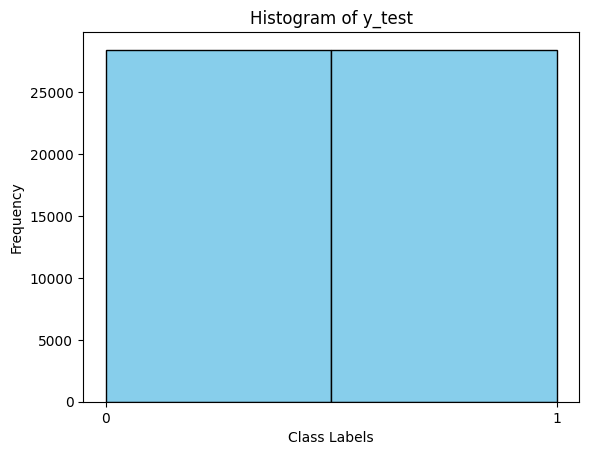

In [7]:
import matplotlib.pyplot as plt

# Plot a histogram of y_test
plt.hist(y_test, bins=2, color='skyblue', edgecolor='black')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Histogram of y_test')
plt.xticks([0, 1])  # Set the x-axis ticks to match your class labels (0 and 1)
plt.show()

# Clustering visualization with t-SNE

In [15]:
X_test_df['label'] = y_test 
X_test_df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Amount,label
0,-0.426853,0.117655,0.888152,-1.295829,0.084298,0.082360,0.536811,-0.174267,1.535622,1.008322,...,-0.179809,-0.328902,0.035453,0.099270,-0.307859,-1.062307,-1.492090,-1.557736,-0.957047,0
1,1.116456,-0.286306,0.263979,-0.264770,0.484545,0.110447,0.637420,-0.219024,0.360507,0.616577,...,-0.127880,-0.140562,-0.294094,-1.007938,1.607509,-0.547411,-0.247355,-0.097371,0.483823,0
2,0.903121,-0.422710,0.745712,-0.002305,0.028963,0.216350,0.344856,-0.143017,1.129443,0.344090,...,-0.139441,-0.092086,-0.179834,0.628331,0.995390,-0.654657,-0.167291,0.036026,0.594075,0
3,1.048906,-0.407290,0.706076,-0.306253,0.155251,0.307304,0.417290,-0.186979,0.773683,0.496063,...,-0.146284,-0.020858,-0.188650,0.011005,1.100080,0.997909,-0.244969,-0.080135,0.227224,0
4,1.819136,-0.403218,-0.076833,-0.445671,0.419591,-0.043953,0.485468,-0.198018,0.873241,0.455003,...,-0.256512,-0.904305,0.328112,0.994757,-0.511889,0.406727,-0.312041,-0.178122,0.773084,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56859,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,-0.698893,...,8.087080,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,0.270806,1
56860,-1.535811,1.248113,-1.545710,1.505286,-1.802151,-1.898256,-1.790458,1.640605,-1.914443,-1.949687,...,0.657279,-0.457577,-0.129479,1.048965,-0.335299,0.639599,-0.387223,-1.075458,1.170887,1
56861,-0.279757,0.233699,-0.035328,0.086027,-0.096854,-0.267732,-0.094551,-0.138916,-0.333507,-0.304370,...,0.312202,0.069608,-0.040540,0.524696,-0.297618,-0.388502,-0.092224,-0.275857,1.087404,1
56862,-0.569473,-0.027554,0.139328,0.034191,0.002329,0.071340,-0.201616,0.084475,-0.074574,-0.426285,...,0.098295,0.186865,-0.709026,-0.112500,0.194652,-0.861808,0.078332,0.285971,0.579656,1


In [16]:
subset_size = 0.1

normal_data = X_test_df[X_test_df['label'] == 0]
anomaly_data = X_test_df[X_test_df['label'] == 1]

normal_data = normal_data.sample(int(len(normal_data) * subset_size), random_state=RANDOM_SEED)
anomaly_data = anomaly_data.sample(int(len(anomaly_data) * subset_size), random_state=RANDOM_SEED)

In [19]:
normal_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Amount,label
27737,1.831376,-0.425184,-0.156849,-0.590230,0.425976,-0.620323,0.749685,-0.280639,0.648628,0.604635,...,-0.039369,0.501127,-0.070151,0.111589,0.592995,0.546824,-0.336250,-0.286826,0.180770,0
19370,1.159247,-0.694962,0.139351,-1.568391,0.956987,2.120481,0.098426,0.014528,0.724475,0.725097,...,-0.215840,-0.824807,0.056536,2.028528,0.505883,-1.260979,-0.261033,-0.061666,1.160038,0
1893,0.950450,-0.410494,0.804592,-0.169285,0.141233,0.464362,0.391427,-0.136079,0.628704,0.592011,...,-0.196065,-0.512775,-0.049971,0.040992,0.776486,-1.358817,-0.197307,-0.057846,0.667355,0
12594,1.704643,-0.349722,-0.078381,-0.132977,0.485714,0.117509,0.477496,-0.169159,0.533031,0.602544,...,-0.004768,0.674214,-0.020311,1.393499,0.350371,-1.166057,-0.230692,-0.164055,1.314193,0
25166,1.184674,-0.900295,0.948603,-1.427881,-0.275303,0.253599,0.069487,-0.178288,-0.299917,1.322212,...,-0.160161,-0.107430,-0.050040,-0.176977,0.327118,-0.470481,-0.168397,-0.005074,-0.793531,0


In [20]:
anomaly_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Amount,label
56169,-0.345369,-0.391389,0.606814,-0.367490,0.523860,-0.233691,0.567427,-0.186340,0.808299,0.852171,...,-0.362112,-0.383692,0.886935,-0.021540,0.783523,0.186084,0.899747,-0.094137,0.917314,1
47802,-0.132941,0.436248,-0.730143,0.451192,-0.079091,-1.151706,-0.117444,0.009035,-0.792257,-0.834932,...,0.189147,0.145350,-0.151406,-0.405049,0.572120,1.463354,0.523098,0.558529,1.316413,1
30325,-0.333223,0.715215,-1.179781,1.257589,-0.940792,-1.012979,-1.354655,0.525853,-0.923283,-1.724503,...,0.603298,0.365120,0.490551,-1.047611,-2.307720,0.855309,2.778523,1.708244,1.149147,1
41026,-1.040591,-1.213673,-0.616139,0.239100,-0.063256,0.226658,-0.470124,0.384301,-0.458870,-0.700301,...,0.380337,1.084100,-1.322492,-2.206354,-0.445724,0.239331,0.905612,-1.531603,1.252740,1
53598,-1.161336,0.528310,-1.169483,0.998217,-0.798066,-1.380016,-0.952326,0.827751,-1.403277,-1.261158,...,0.318367,-0.523118,0.013709,-0.604327,0.501794,2.056791,1.680844,-0.760172,-0.460367,1


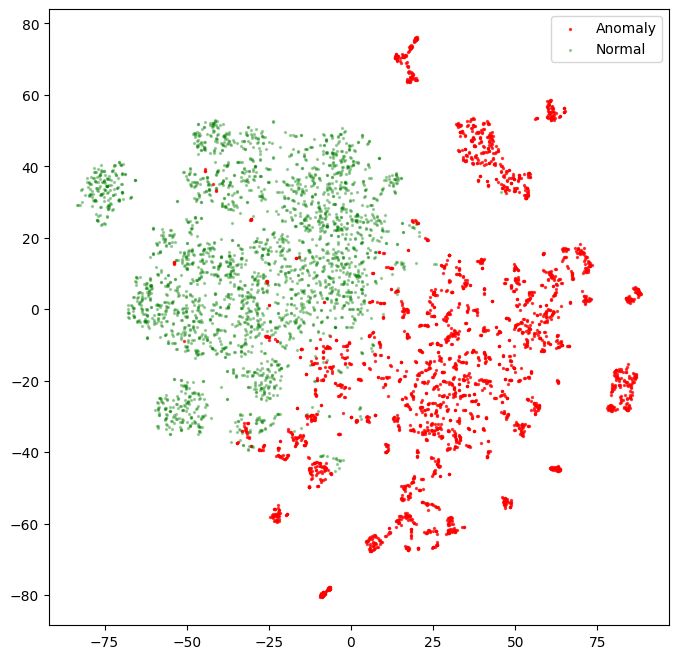

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_test and y_test are already defined
features = pd.concat([normal_data, anomaly_data])
labels = features['label']

from mpl_toolkits.mplot3d import Axes3D

def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
    if dimensions not in (2, 3):
        raise ValueError('tsne_scatter can only plot in 2d or 3d. Make sure the "dimensions" argument is in (2, 3)')

    # t-SNE dimensionality reduction
    features_embedded = TSNE(n_components=dimensions, random_state=RANDOM_SEED).fit_transform(features)
    
    # initialising the plot
    fig, ax = plt.subplots(figsize=(8,8))
    
    # counting dimensions
    if dimensions == 3: 
        ax = fig.add_subplot(111, projection='3d')

    # plotting data
    ax.scatter(
        *zip(*features_embedded[np.where(labels == 1)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='Anomaly'
    )
    ax.scatter(
        *zip(*features_embedded[np.where(labels == 0)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='Normal'
    )

    # storing it to be displayed later
    plt.legend(loc='best')
    plt.savefig(save_as)
    plt.show()

# Call the function to create the scatter plot
tsne_scatter(features, labels, dimensions=2, save_as='tsne_test_2d.png')


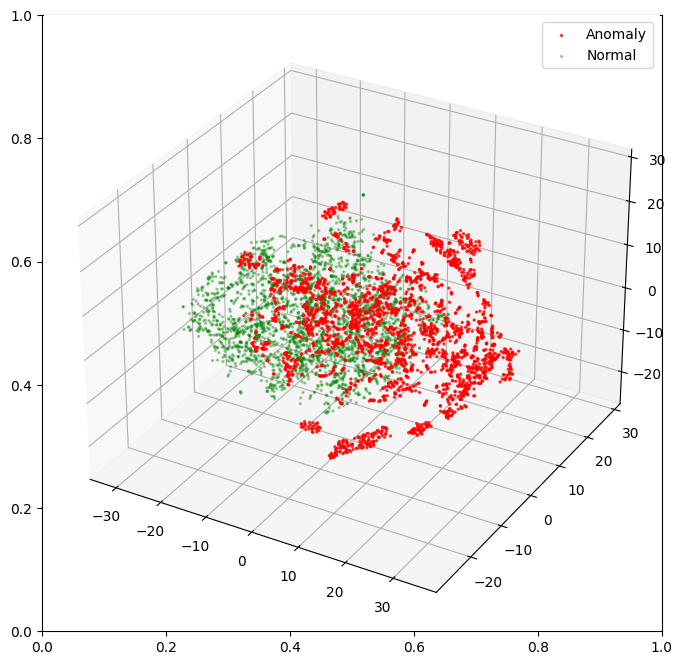

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_test and y_test are already defined
features = pd.concat([normal_data, anomaly_data])
labels = features['label']

from mpl_toolkits.mplot3d import Axes3D

def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
    if dimensions not in (2, 3):
        raise ValueError('tsne_scatter can only plot in 2d or 3d. Make sure the "dimensions" argument is in (2, 3)')

    # t-SNE dimensionality reduction
    features_embedded = TSNE(n_components=dimensions, random_state=RANDOM_SEED).fit_transform(features)
    
    # initialising the plot
    fig, ax = plt.subplots(figsize=(8,8))
    
    # counting dimensions
    if dimensions == 3: 
        ax = fig.add_subplot(111, projection='3d')

    # plotting data
    ax.scatter(
        *zip(*features_embedded[np.where(labels == 1)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='Anomaly'
    )
    ax.scatter(
        *zip(*features_embedded[np.where(labels == 0)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='Normal'
    )

    # storing it to be displayed later
    plt.legend(loc='best')
    plt.savefig(save_as)
    plt.show()

# Call the function to create the scatter plot
tsne_scatter(features, labels, dimensions=3, save_as='tsne_test_3d.png')


# Evaluation method

In [26]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    precision_recall_curve,
    r2_score,
    roc_auc_score,
    classification_report,
    roc_curve, 
    auc
)

def evaluation_method(y_true, y_pred):

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print("Evaluation Metrics:")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"AUC-ROC: {roc_auc}")
    
    # Calculate ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    # Calculate Precision-Recall Curve and AUC
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    pr_auc = auc(recall, precision)

    # Generate a classification report
    class_report = classification_report(y_true, y_pred)

    # Plotting the ROC and Precision-Recall Curves
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (OCSVM)')
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve (OCSVM)')
    plt.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

    print(class_report)

# Anomaly Detection

## Baselines

### Naive Baseline (always say normal data)
---> the other baselines should at least be as good as this naive baseline

Evaluation Metrics for k=2:
Precision: 0.5
Recall: 1.0
F1-Score: 0.6666666666666666
AUC-ROC: 0.5


C:\Users\Hasan\anaconda3\envs\pytorch3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hasan\anaconda3\envs\pytorch3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hasan\anaconda3\envs\pytorch3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


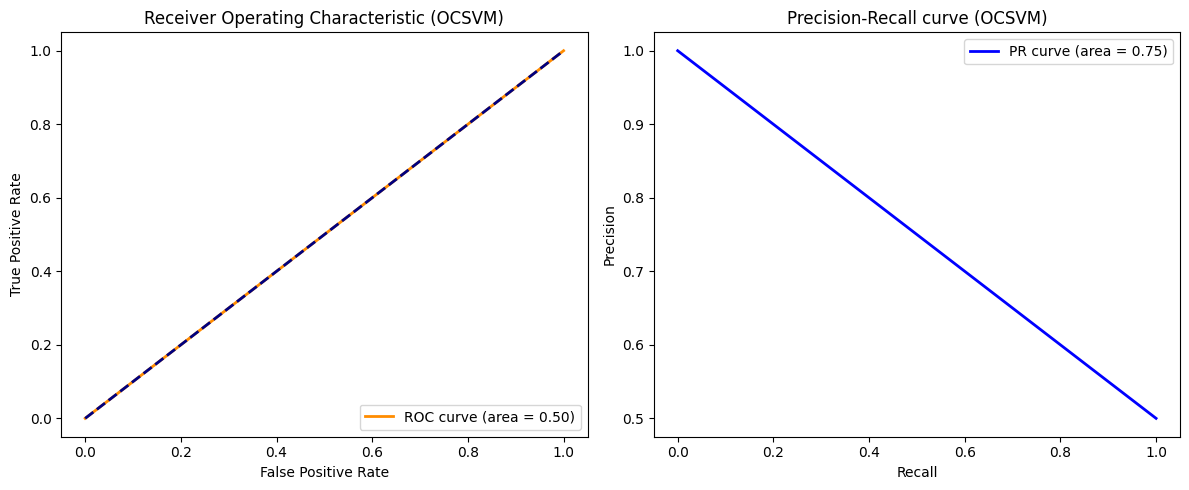

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28432
           1       0.50      1.00      0.67     28432

    accuracy                           0.50     56864
   macro avg       0.25      0.50      0.33     56864
weighted avg       0.25      0.50      0.33     56864



In [91]:
y_pred = [True for i in X_test]  # naive

evaluation_method(y_test, y_pred)

### Kmeans (88 % F1 score for k=2, 91% F1 score for k=3)

<span style="font-size: 150%; color:green">pretty good</span>

- **one idea**: put training and testing data together and then try to create two clusters (if only training data is taken, then it makes no sense because there are no anomalies)
    - problem: unknown if its better to only use the testing data

- **problem**: this method is not very well suited for our problem because:
    - When you set k=2 in K-means, you are essentially asking the algorithm to partition the data into two clusters. However, the clusters may not correspond to "anomalies" and "normal" in a straightforward way. K-means aims to minimize the sum of squared distances within clusters, and it may not be well-suited for directly separating anomalies from normal data. (so it could be that setting k=10 is better and 8 of the 10 clusters are normal data and 2 of the 10 clusters are anomalies which the algorithm would not find when setting k=2)
        - **counteract**: try out different values of k only on the testing data and look at the elbow curve. Look for the point on the plot where the inertia starts to decrease at a slower rate, forming an "elbow." This point is a good candidate for the optimal k. It indicates that adding more clusters beyond this point doesn't significantly reduce the inertia.
- **improvement**: rescale the data!

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

we can see that
- the inertia drops heavily for k=2 (probably best)
- but k=3 can also be considered (and then two clusters are normal data and one cluster is anomaly for example)

K-value:  1
K-value:  2
K-value:  3
K-value:  4
K-value:  5
K-value:  6
K-value:  7
K-value:  8
K-value:  9
K-value:  10


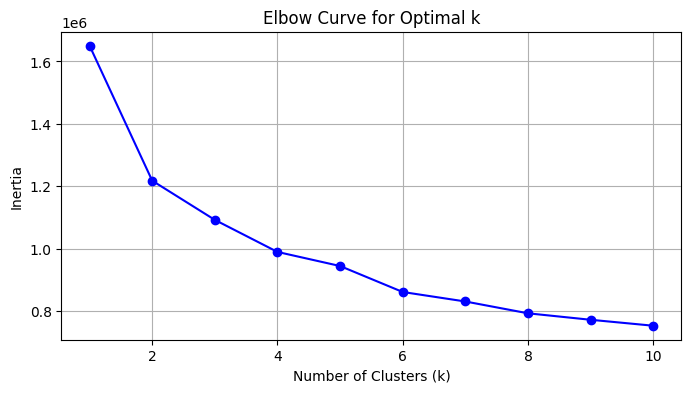

In [25]:
# Define a range of k values to test 1- 10
k_values = range(1, 11)
inertia_values = []

# Fit K-means for each k and compute inertia
for k in k_values:
    print("K-value: ", k)
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=RANDOM_SEED)
    kmeans.fit(X_test)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia value')
plt.title('Elbow Curve for Optimal k')
plt.grid(True)
plt.show()

### how to say which cluster is anomaly and which not? 
--> its really not that easy in our case because the number of anomaly data points is the same as normal data points, the intertia is also not a indicator here ...

- **Size of the Cluster** (not applicable in our case because y_test is equally distributed):
    - One straightforward approach is to consider the size of each cluster. Smaller clusters are more likely to be anomalies, as they represent data points that are less common. You can set a threshold on the cluster size and flag clusters with fewer points as potential anomalies.

- **Distance to Cluster Center**:
    - Calculate the distance of each data point in a cluster to the cluster's centroid. Data points that are far from the centroid are more likely to be anomalies. You can set a threshold on the distance to identify anomalies within a cluster.

- Other methods: 
    - **Manual Inspection (through plots)**
    - Inertia or Variance within Cluster:
    - Statistical Significance:
    
### **BEST IDEA**:
    - compute centroid in training data
    - then compute centroids in the clusters of the testing data
        - the centroid that is closer to the centroid in training data is normal data

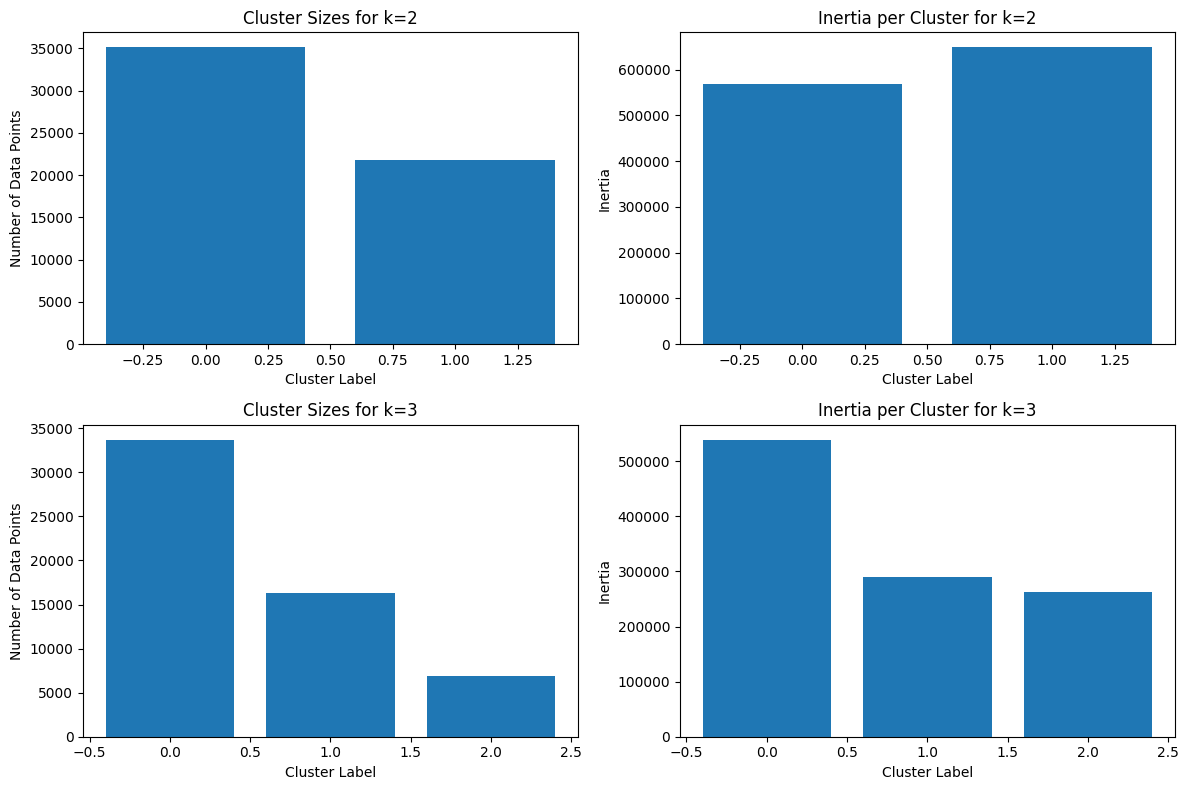

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize subplots for k=2 and k=3
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Loop through k=2 and k=3
for idx, k in enumerate([2, 3]):
    # Fit K-means for the current k
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=RANDOM_SEED)
    cluster_assignments = kmeans.fit_predict(X_test)
    
    # Compute cluster sizes
    unique, counts = np.unique(cluster_assignments, return_counts=True)
    cluster_sizes = dict(zip(unique, counts))
    
    # Compute inertia per cluster
    cluster_inertia = np.zeros(k)
    for cluster_label in range(k):
        cluster_points = X_test[cluster_assignments == cluster_label]
        cluster_center = kmeans.cluster_centers_[cluster_label]
        cluster_inertia[cluster_label] = np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1) ** 2)
    
    # Plot cluster sizes
    axes[idx, 0].bar(cluster_sizes.keys(), cluster_sizes.values())
    axes[idx, 0].set_title(f'Cluster Sizes for k={k}')
    axes[idx, 0].set_xlabel('Cluster Label')
    axes[idx, 0].set_ylabel('Number of Data Points')
    
    # Plot inertia per cluster
    axes[idx, 1].bar(range(k), cluster_inertia)
    axes[idx, 1].set_title(f'Inertia per Cluster for k={k}')
    axes[idx, 1].set_xlabel('Cluster Label')
    axes[idx, 1].set_ylabel('Inertia')

# Add spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

#### evaluate for k=2 (far away cluster centroid is anomaly cluster)

In [92]:
from sklearn.cluster import KMeans

# Assuming X_train and X_test are your training and testing data respectively

# Step 1: Compute Centroid of Training Data
centroid_train = np.mean(X_train, axis=0)

# Step 2: Apply KMeans to Testing Data
kmeans_test = KMeans(n_clusters=2, n_init=10, random_state=0).fit(X_test)
centroids_test = kmeans_test.cluster_centers_

# Step 3: Compare Centroids and Determine Anomaly Cluster
distances = np.linalg.norm(centroids_test - centroid_train, axis=1)
normal_cluster = np.argmin(distances)
anomaly_cluster = 1 - normal_cluster  # Assuming k=2, the other cluster is the anomaly

# Step 4: Assign Anomaly Labels
y_pred = (kmeans_test.labels_ == anomaly_cluster).astype(int)

Evaluation Metrics for k=2:
Precision: 0.999815973500184
Recall: 0.7643500281373101
F1-Score: 0.8663690001594643
AUC-ROC: 0.8821046707934721


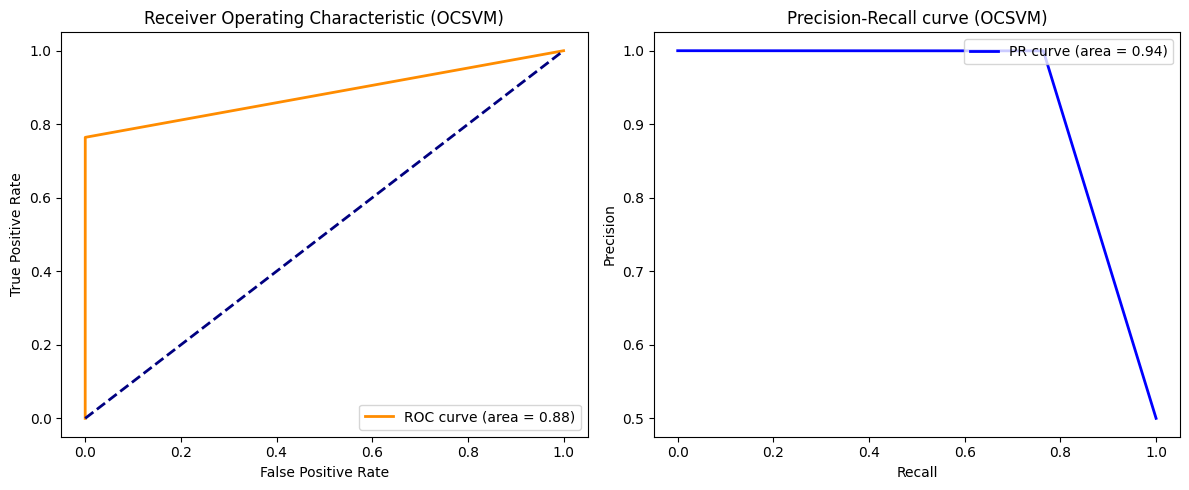

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     28432
           1       1.00      0.76      0.87     28432

    accuracy                           0.88     56864
   macro avg       0.90      0.88      0.88     56864
weighted avg       0.90      0.88      0.88     56864



In [93]:
evaluation_method(y_test, y_pred)

#### evaluate for k=3 (only closest centroid is normal, all other clusters are anomalies)

In [95]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming X_train and X_test are your training and testing data respectively

# Step 1: Compute Centroid of Training Data
centroid_train = np.mean(X_train, axis=0)

# Step 2: Apply KMeans to Testing Data with 3 clusters
kmeans_test = KMeans(n_clusters=3, n_init=10, random_state=0).fit(X_test)
centroids_test = kmeans_test.cluster_centers_

# Step 3: Compare Centroids and Determine Normal Cluster
distances = np.linalg.norm(centroids_test - centroid_train, axis=1)
normal_cluster = np.argmin(distances)

# Step 4: Assign Anomaly Labels
# Label as 1 (anomaly) if not in the normal cluster, otherwise 0 (normal)
y_pred = np.where(kmeans_test.labels_ == normal_cluster, 0, 1)

Evaluation Metrics for k=2:
Precision: 0.9997841291771005
Recall: 0.814469611705121
F1-Score: 0.8976625188975462
AUC-ROC: 0.907146876758582


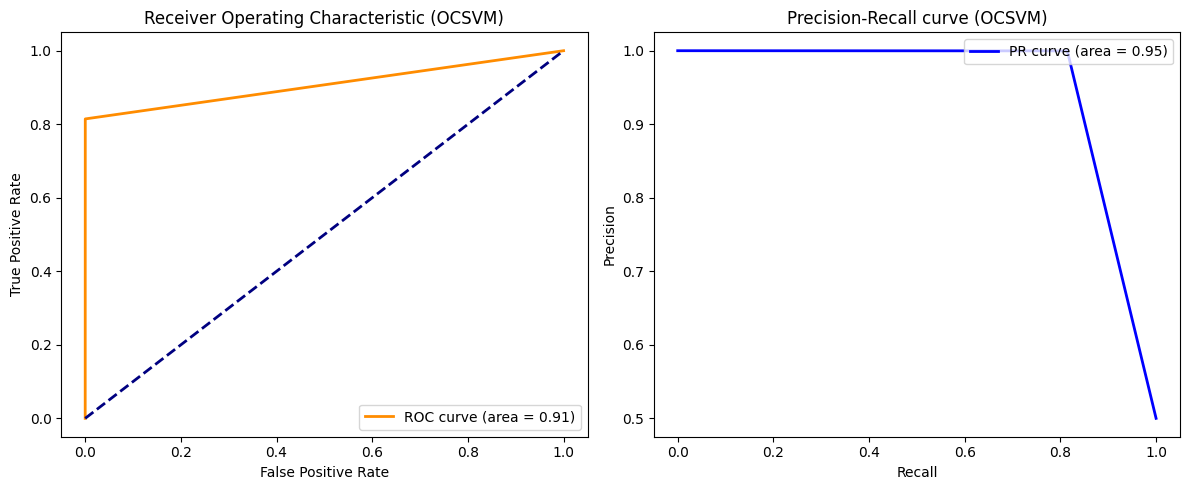

              precision    recall  f1-score   support

           0       0.84      1.00      0.92     28432
           1       1.00      0.81      0.90     28432

    accuracy                           0.91     56864
   macro avg       0.92      0.91      0.91     56864
weighted avg       0.92      0.91      0.91     56864



In [96]:
evaluation_method(y_test, y_pred)

### DBScan (this method is really not well suited for this anomaly detection problem, its very very parameter dependent... )
<span style="font-size: 150%; color:red">maybe investigate at some point later by doing grid search on the parameters</span>

Hyperparameters
- Epsilon value
- Min samples

how to find out a good epsilon value?

**K-Distance Graph (Elbow Curve again)**:

- Calculate the k-distance for each data point, which represents the distance to its k-th nearest neighbor. You can choose a value of k that makes sense for your data, such as 4 or 5.
- Sort these k-distances in ascending order.
- Plot the sorted k-distances on a graph. Typically, you'll see a "k-distance elbow" in the graph, where the distances suddenly increase. This point can be a good estimate for the epsilon value.

how to find a good min samples value?

**Min Samples to Number of Clusters Plot (similar to elbow curve)**

- after having found a good epsilon, run the DBScan algorithm for different min sample values and look how many clusters are made for the different values. There are different strategies to pick here:
    - take the min samples value after the greatest change 
    - take the min samples value before the cluster size goes to 1 or 0 (**our approach**)
    


**Improvement**: 
- Let min samples / epsilon grid search run through one time

In [38]:
from sklearn.cluster import DBSCAN

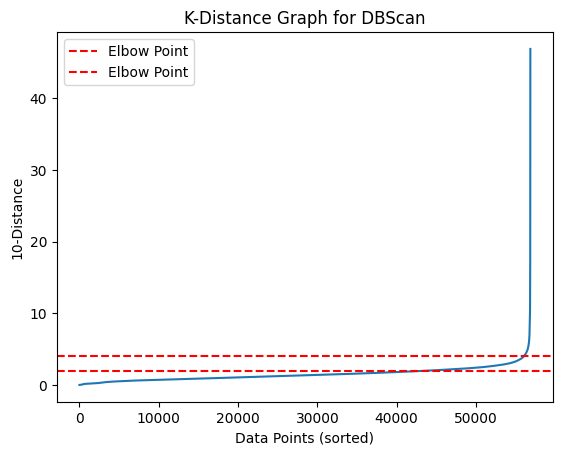

In [35]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Lets consider 10 as nearest neighbors
k = 10

# Calculate k-distances
neigh = NearestNeighbors(n_neighbors=k)
distances, _ = neigh.fit(X_test).kneighbors(X_test)
k_distances = distances[:, -1]  # Get the k-th nearest neighbor distance

# Sort the distances
sorted_distances = np.sort(k_distances)

# Compute the second derivative
# second_derivative = np.diff(np.diff(sorted_distances))

# Find the elbow point (where the second derivative changes from negative to positive)
# elbow_index = np.where(second_derivative > 0)[0][0]

# Plot the k-distance graph with the elbow point
plt.plot(sorted_distances)
#plt.plot(second_derivative, label='Second derivative')
#plt.axvline(x=elbow_index, color='r', linestyle='--', label='Elbow Point')
plt.axhline(y=2, color='r', linestyle='--', label='Elbow Point')
plt.axhline(y=4, color='r', linestyle='--', label='Elbow Point')
plt.xlabel('Data Points (sorted)')
plt.ylabel(f'{k}-Distance')
plt.title(f'K-Distance Graph for DBScan')
plt.legend()
plt.show()

# The elbow_index variable contains the index of the elbow point
# epsilon = sorted_distances[elbow_index]
# print(f"Estimated Epsilon (ε): {epsilon}")

--> we can see that it makes sense to choose epsilon somewhere between 0.25 and 0.4. 

In [36]:
min_samples = range(2,11)
eps = np.arange(2, 4, 0.1)

#### measuring cluster goodness via silhoutte score (takes very long)

In [40]:
# takes very long ...
from sklearn.metrics import silhouette_score

output = []

for ms in min_samples:
    print("Min Sample: ", ms)
    for ep in eps:
        print("Epsilon: ", ep)
        labels = DBSCAN(min_samples=ms, eps = ep).fit(X_test).labels_
        print("DBScan finished!")
        print(labels)
        score = silhouette_score(X_test, labels)
        output.append((ms, ep, score))

Min Sample:  2
Epsilon:  2.0
DBScan finished!
[-1  0  0 ...  0  0  0]


KeyboardInterrupt: 

In [46]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 464
min_samples: 2
eps: 2.0


#### measuring cluster goodness via number of created clusters

In [41]:
# takes very long ...
from sklearn.metrics import silhouette_score

output = []

for ms in min_samples:
    print("Min Sample: ", ms)
    for ep in eps:
        print("Epsilon: ", ep)
        labels = DBSCAN(min_samples=ms, eps = ep).fit(X_test).labels_
        print("DBScan finished!")
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        output.append((ms, ep,n_clusters))
        print("Number of clusters: ", n_clusters)

Min Sample:  2
Epsilon:  2.0
DBScan finished!
Number of clusters:  464
Epsilon:  2.1
DBScan finished!
Number of clusters:  383
Epsilon:  2.2
DBScan finished!
Number of clusters:  312
Epsilon:  2.3000000000000003
DBScan finished!
Number of clusters:  247
Epsilon:  2.4000000000000004
DBScan finished!
Number of clusters:  220
Epsilon:  2.5000000000000004
DBScan finished!
Number of clusters:  173
Epsilon:  2.6000000000000005
DBScan finished!
Number of clusters:  148
Epsilon:  2.7000000000000006
DBScan finished!
Number of clusters:  119
Epsilon:  2.8000000000000007
DBScan finished!
Number of clusters:  109
Epsilon:  2.900000000000001
DBScan finished!
Number of clusters:  96
Epsilon:  3.000000000000001
DBScan finished!
Number of clusters:  82
Epsilon:  3.100000000000001
DBScan finished!
Number of clusters:  75
Epsilon:  3.200000000000001
DBScan finished!
Number of clusters:  64
Epsilon:  3.300000000000001
DBScan finished!
Number of clusters:  49
Epsilon:  3.4000000000000012
DBScan finished!



KeyboardInterrupt



In [42]:
output

[(2, 2.0, 464),
 (2, 2.1, 383),
 (2, 2.2, 312),
 (2, 2.3000000000000003, 247),
 (2, 2.4000000000000004, 220),
 (2, 2.5000000000000004, 173),
 (2, 2.6000000000000005, 148),
 (2, 2.7000000000000006, 119),
 (2, 2.8000000000000007, 109),
 (2, 2.900000000000001, 96),
 (2, 3.000000000000001, 82),
 (2, 3.100000000000001, 75),
 (2, 3.200000000000001, 64),
 (2, 3.300000000000001, 49),
 (2, 3.4000000000000012, 50),
 (2, 3.5000000000000013, 42),
 (2, 3.6000000000000014, 41),
 (2, 3.7000000000000015, 43),
 (2, 3.8000000000000016, 36),
 (2, 3.9000000000000017, 32),
 (3, 2.0, 137),
 (3, 2.1, 114),
 (3, 2.2, 85),
 (3, 2.3000000000000003, 79),
 (3, 2.4000000000000004, 61),
 (3, 2.5000000000000004, 51),
 (3, 2.6000000000000005, 46),
 (3, 2.7000000000000006, 40),
 (3, 2.8000000000000007, 32),
 (3, 2.900000000000001, 28),
 (3, 3.000000000000001, 25),
 (3, 3.100000000000001, 25)]

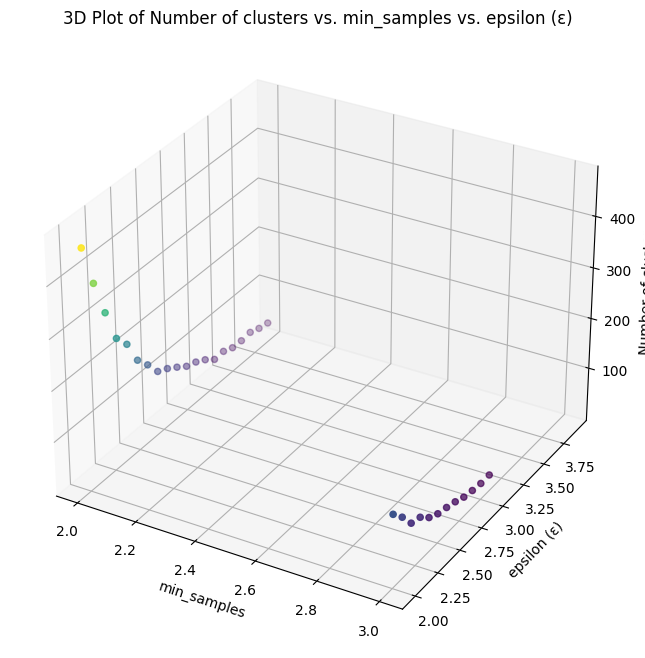

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Your output data
output = [
    (ms, ep, score) for ms, ep, score in output
]

# Separate the data into three lists
min_samples_values = [item[0] for item in output]
epsilon_values = [item[1] for item in output]
silhouette_scores = [item[2] for item in output]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(min_samples_values, epsilon_values, silhouette_scores, c=silhouette_scores, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('min_samples')
ax.set_ylabel('epsilon (ε)')
ax.set_zlabel('Number of clusters')

# Set the title
ax.set_title('3D Plot of Number of clusters vs. min_samples vs. epsilon (ε)')

plt.show()


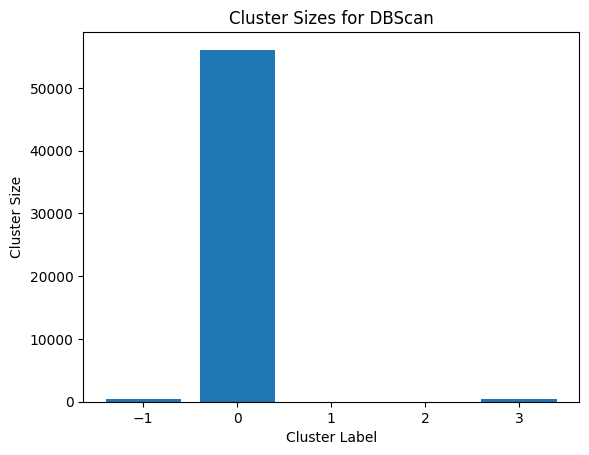

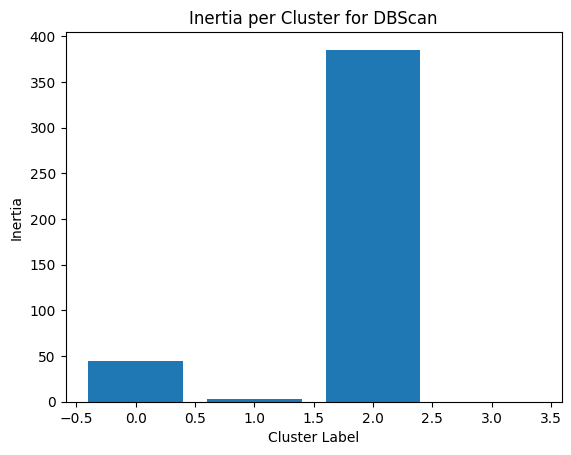

In [97]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np


# Fit DBScan with min_samples=7 and computed epsilon
dbscan = DBSCAN(eps=4, min_samples=5)
cluster_labels = dbscan.fit_predict(X_test)

# Plot the cluster sizes
unique_labels, cluster_sizes = np.unique(cluster_labels, return_counts=True)
plt.bar(unique_labels, cluster_sizes)
plt.xlabel('Cluster Label')
plt.ylabel('Cluster Size')
plt.title('Cluster Sizes for DBScan')
plt.show()

# Calculate the inertia per cluster
inertia_per_cluster = np.zeros(len(unique_labels))
for label in unique_labels:
    if label != -1:  # Exclude noise cluster
        cluster_points = X_test[cluster_labels == label]
        cluster_center = np.mean(cluster_points, axis=0)
        inertia = np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1) ** 2)
        inertia_per_cluster[label] = inertia

# Plot the inertia per cluster
plt.bar(unique_labels[unique_labels != -1], inertia_per_cluster[unique_labels != -1])
plt.xlabel('Cluster Label')
plt.ylabel('Inertia')
plt.title('Inertia per Cluster for DBScan')
plt.show()

In [98]:
cluster_sizes

array([  393, 56087,     7,     5,   372], dtype=int64)

In [99]:
y_pred = (cluster_labels != 0)
len(y_pred)

56864

Evaluation Metrics for k=2:
Precision: 0.47876447876447875
Recall: 0.013083849184018007
F1-Score: 0.025471601218802424
AUC-ROC: 0.49941966797974113


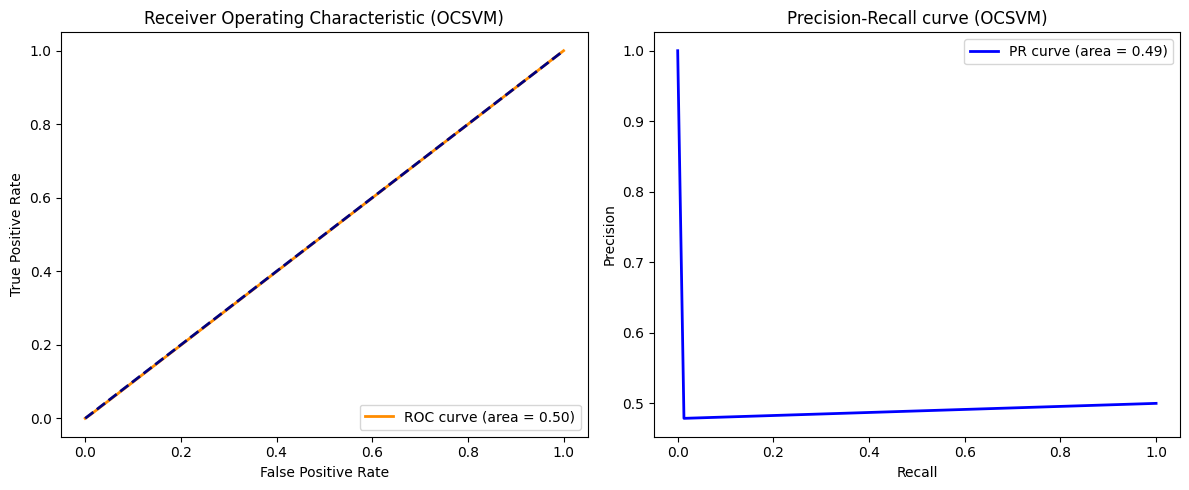

              precision    recall  f1-score   support

           0       0.50      0.99      0.66     28432
           1       0.48      0.01      0.03     28432

    accuracy                           0.50     56864
   macro avg       0.49      0.50      0.34     56864
weighted avg       0.49      0.50      0.34     56864



In [100]:
evaluation_method(y_test, y_pred)

### One-Class SVM (72% F1-score for OCSVM, 75% for SGD-OCSVM)

<span style="font-size: 150%; color:green">ok results, might let run OCSVM run through one time</span>

- sklearn.svm.OneClassSVM takes really long because of quadratic running time (not well suited for high dimensional data and a lot of data)
- sklearn.linear.SGDOneClassSVM is much faster but only uses a linear kernel (only 0.18 seconds compared to hours i dont know...)
    - does only say 1 for everything if data is not scaled (not better than naive classifier)
    - does perform better when the data is MinMax scaled
        - --> this really indicates that the linear kernel is underfitting the high-dimensional data and we should apply dimension reduction in order to apply SGD OCSVM
    - taking subset of the training data has no influence on the two oberservations above 
    
**Improvement**: Data dimensionality reduction before applying one-class SVM is highly recommended! this was not the case for the previous two methods

#### OCSVM (only minibatch training because of comp. time, says only 0 on test set)

In [89]:
from sklearn.svm import OneClassSVM
import time

# Timing and Training the One-Class SVM model
start_time = time.time()
oc_svm = OneClassSVM().fit(X_train[:10000]) # train on subset because of huge computing time
oc_svm_duration = time.time() - start_time
print(f"One-Class SVM training time: {oc_svm_duration:.2f} seconds")

One-Class SVM training time: 3.89 seconds


Evaluation Metrics for k=2:
Precision: 0.6513172351490588
Recall: 0.9382386043894204
F1-Score: 0.7688826759284614
AUC-ROC: 0.7179762239729882


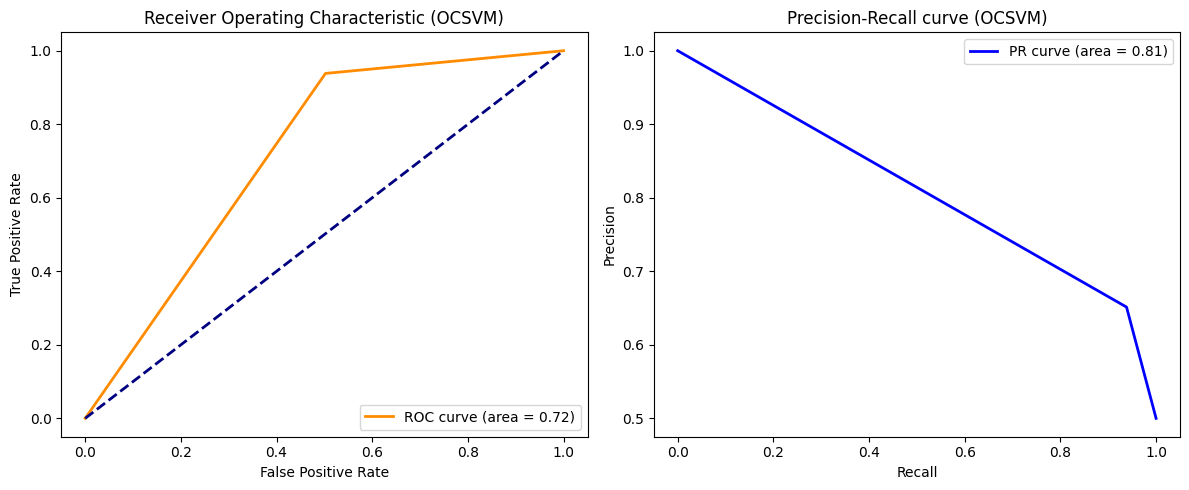

              precision    recall  f1-score   support

           0       0.89      0.50      0.64     28432
           1       0.65      0.94      0.77     28432

    accuracy                           0.72     56864
   macro avg       0.77      0.72      0.70     56864
weighted avg       0.77      0.72      0.70     56864



In [90]:
# predict
y_pred_test = oc_svm.predict(X_test)

# Convert predictions to match y_test labels (-1 for anomalies, 1 for normal)
y_pred_test = (y_pred_test == -1).astype(int)

evaluation_method(y_test, y_pred_test)

#### SGD OCSVM (very fast but no groundbreaking results)

In [86]:
from sklearn.linear_model import SGDOneClassSVM
import time

# Timing and Training the One-Class SVM model
start_time = time.time()
sgd_oc_svm = SGDOneClassSVM().fit(X_train)
oc_svm_duration = time.time() - start_time
print(f"SGD One-Class SVM training time: {oc_svm_duration:.2f} seconds")

SGD One-Class SVM training time: 0.23 seconds


Evaluation Metrics for k=2:
Precision: 0.6815294405081848
Recall: 0.9811128306133934
F1-Score: 0.8043309016464347
AUC-ROC: 0.7613252673044457


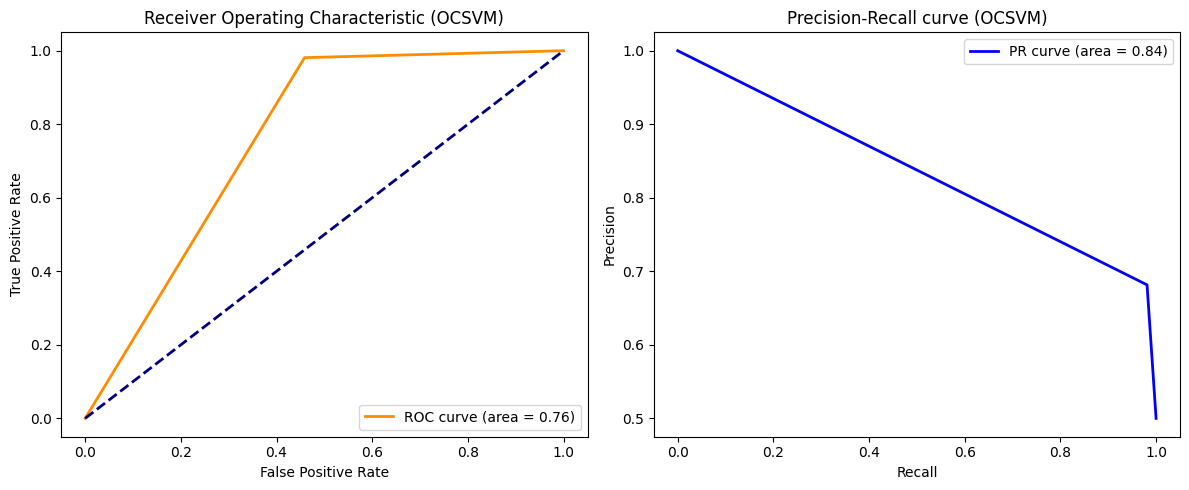

              precision    recall  f1-score   support

           0       0.97      0.54      0.69     28432
           1       0.68      0.98      0.80     28432

    accuracy                           0.76     56864
   macro avg       0.82      0.76      0.75     56864
weighted avg       0.82      0.76      0.75     56864



In [87]:
# predict
y_pred = sgd_oc_svm.predict(X_test)

# Convert predictions to match y_test labels (-1 for anomalies, 1 for normal)
y_pred = (y_pred == -1).astype(int)

evaluation_method(y_test, y_pred)

### kNN distance

<span style="font-size: 150%; color:green">somehow good results f1-score of 89% for k=11 and percentile=95% (also good: for k=7 and percentile=95%, also for percentile=90%, then recall goes up and precision down) i think higher k is better up until a point</span>

<span style="font-size: 150%; color:green">its very easy to get high precision with kNN distance because after a certtain threshold distance, all data points are indeed anomalies.</span>

<span style="font-size: 150%; color:red">however recall is often bad</span>

This is how the literature describes kNN distance:

1. **Calculate the Distance**: For each data point, calculate the distance to its k-nearest neighbors. The distance metric can be Euclidean, Manhattan, or any other appropriate measure.

2. **Anomaly Score**: The anomaly score for each data point can be determined by the distance to its kth nearest neighbor, the average distance to its k neighbors, or the sum of these distances.

3. **Thresholding**: Define a threshold to classify a data point as an anomaly. This can be a fixed value, a certain percentile of the distances, or based on domain knowledge.

4. **Labeling Anomalies**: Points with distances or scores above the threshold are labeled as anomalies.

In [129]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Set the number of neighbors
k = 5

# Initialize and fit the NearestNeighbors model
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_train)

NearestNeighbors()

In [130]:
# Calculate the distance to the kth nearest neighbor for each point in the training set
distances, indices = neigh.kneighbors(X_train)
kth_dist_train = distances[:, k-1]

# Calculate the distance to the kth nearest neighbor for each point in the test set
distances_test, indices_test = neigh.kneighbors(X_test)
kth_dist_test = distances_test[:, k-1]

#### we can clearly see that the k-th distance of anomaly points are significantly higher than training data points

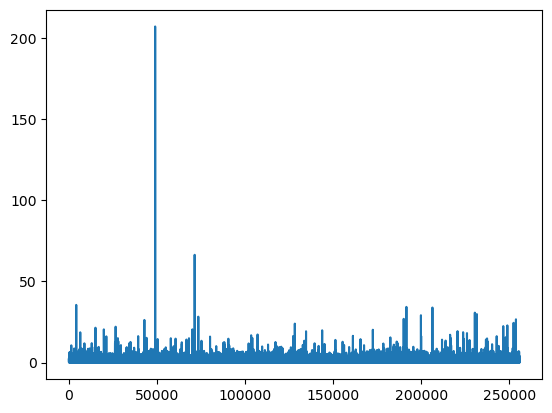

In [117]:
plt.plot(distances.mean(axis=1))

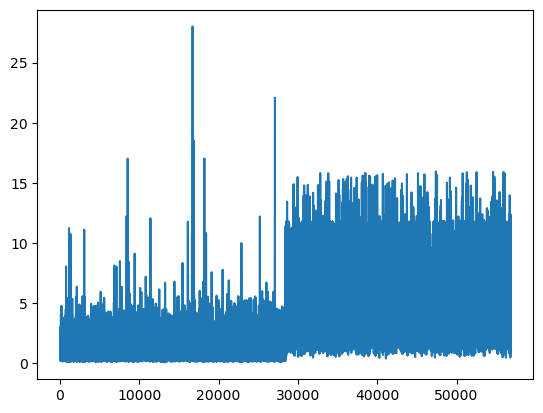

In [118]:
plt.plot(distances_test.mean(axis=1))

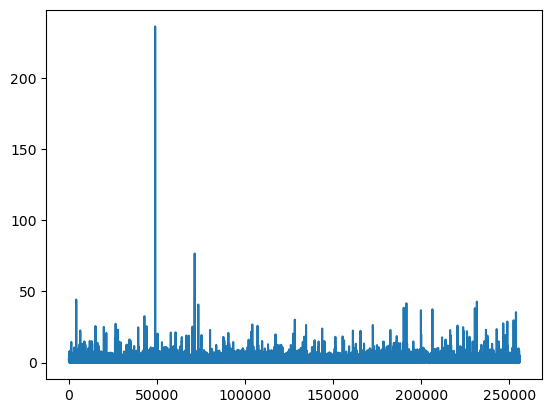

In [119]:
plt.plot(kth_dist_train)

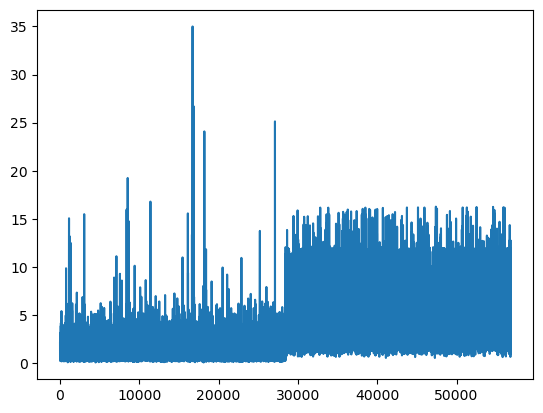

In [120]:
plt.plot(kth_dist_test)

In [131]:
# Set a threshold for anomaly detection
# This could be a fixed value or based on a percentile. Here we use the 95th percentile of the training distances.
threshold = np.percentile(kth_dist_train, 95)
threshold

2.6286396111732144

In [99]:
sorted_kth_dist_train = sorted(kth_dist_train, reverse=True)
sorted_kth_dist_train

[231.58170800311655,
 75.34766834711507,
 41.45826222752033,
 39.47558308072316,
 38.75067633409179,
 37.84299075966669,
 37.45606841538365,
 36.04541894912228,
 33.87898445942134,
 32.92035261007305,
 29.93201222006065,
 29.281507323414687,
 27.945791284849015,
 27.199257580885142,
 26.322590313811357,
 25.299741666938015,
 25.256245012334936,
 24.573777233814187,
 24.3385229475142,
 24.04348661857573,
 23.920897022832015,
 23.167622872836553,
 22.41154147643096,
 21.96099883386467,
 21.75693054789875,
 21.709947460533478,
 21.51868412429663,
 20.48682481056162,
 20.04830255507245,
 19.877038685780757,
 19.811834668236987,
 19.60468516975103,
 19.596655789475694,
 19.46309502567557,
 19.147727774055344,
 19.096812892439107,
 19.01926207095895,
 18.93877447673168,
 18.84511180846073,
 18.7142493059635,
 18.385666569836438,
 18.217796393957958,
 18.049413121119784,
 17.923995455235797,
 17.915859819719493,
 17.90551298945387,
 17.774668602758506,
 17.772574763860167,
 17.711335409632685

In [122]:
# how is the performance on the training dataset?
anomalies_train = kth_dist_train > threshold

In [123]:
# only 1 % is considered to be anomomalous data if i set percentile to 99%
sum(anomalies_train) / len(anomalies_train)

0.05000332183068043

In [132]:
# Detect anomalies in the test set
anomalies_test = kth_dist_test > threshold

In [133]:
# 20% is considered anomalous data
sum(anomalies_test) / len(anomalies_test)

0.44947594259988743

Evaluation Metrics:
Precision: 0.9368128643530654
Recall: 0.8421496904895892
F1-Score: 0.8869626419218017
AUC-ROC: 0.8926737478897018


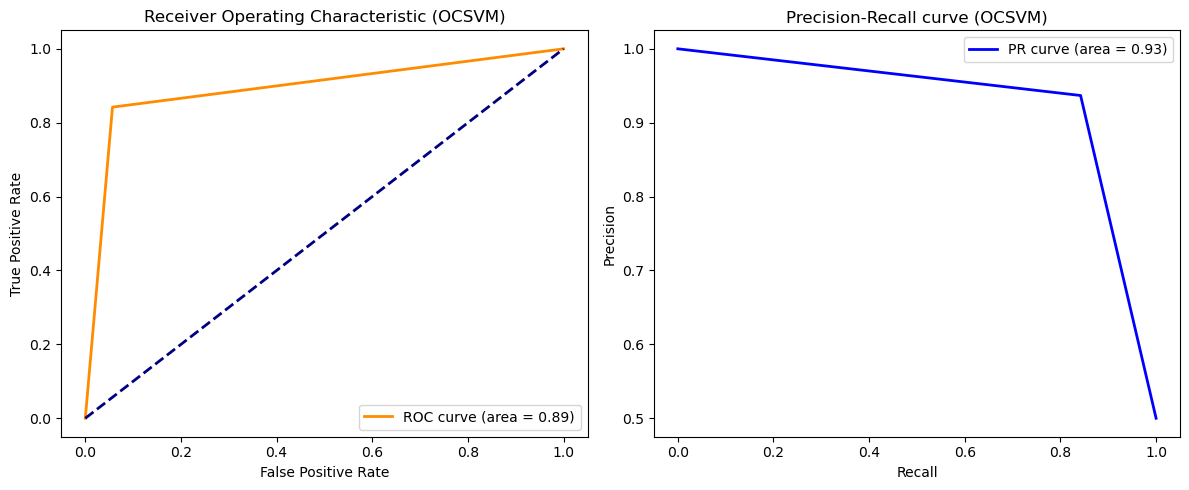

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     28432
           1       0.94      0.84      0.89     28432

    accuracy                           0.89     56864
   macro avg       0.90      0.89      0.89     56864
weighted avg       0.90      0.89      0.89     56864



In [136]:
# Convert boolean anomaly flags to integer labels (1 for anomalies, 0 for normal)
y_pred = (anomalies_test == True).astype(int)

evaluation_method(y_test, y_pred)

In [81]:
np.unique(np.array(y_pred_test_knn))

array([0, 1])

### Local Outlier Factor (LOF)

<span style="font-size: 150%; color:red">my opinion: not suited for our problem at hand</span>

[see here for a blog post](https://towardsdatascience.com/local-outlier-factor-lof-algorithm-for-outlier-identification-8efb887d9843)

Local Outlier Factor (LOF) is an algorithm used for detecting anomalies in a dataset. It is particularly useful in situations where the data contains clusters of varying densities. LOF works by measuring the local deviation of a given data point with respect to its neighbors, allowing it to identify outliers that may not stand out in the global context but are anomalous in their local regions.

Advantages of LOF

- A point will be considered as an outlier if it is at a small distance to the extremely dense cluster. The global approach may not consider that point as an outlier. But the LOF can effectively identify the local outliers.

Disadvantages of LOF

- Since LOF is a ratio, it is tough to interpret. There is no specific threshold value above which a point is defined as an outlier. The identification of an outlier is dependent on the problem and the user.

The main parameters for LOF are:

- **Number of Neighbors (n_neighbors)**: This is the number of neighbors to consider when calculating the local density. A small number of neighbors can make the algorithm sensitive to local noise, while too large a number may blend densities of different clusters. A common approach is to start with a value like 20 and adjust based on the dataset's characteristics and the results obtained.

- **Contamination (contamination)**: This parameter represents the proportion of outliers you expect in your data. It's used to automatically determine the threshold for labeling a point as an outlier. It can be set based on domain knowledge or exploratory analysis. <span style="color:red">contamination is 0 in the training data but the method of sklearn does not allow us to set it to 0, so we pick a very low value of contamination</span>

- **Metric (metric)**: This defines the distance metric to use for calculating distances between instances. Common choices include 'euclidean', 'manhattan', or 'minkowski'.

- **Algorithm (algorithm)**: This parameter determines the algorithm used to compute the nearest neighbors. Options like 'auto', 'ball_tree', 'kd_tree', and 'brute' can be chosen based on dataset size and feature characteristics.

In [137]:
# code snippet
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
X = [[-1.1], [0.2], [101.1], [0.3]]
clf = LocalOutlierFactor(n_neighbors=2)
clf.fit_predict(X)

array([ 1,  1, -1,  1])

#### parameter search for n_neighbors (no parameter leads to good results)

In [138]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score

# Define the range of n_neighbors to test
n_neighbors_range = range(5, 50, 5)  # For example, from 5 to 45 in steps of 5

# Variable to store the best parameter and corresponding score
best_n_neighbors = None
best_score = -1

# Loop over the range of n_neighbors values
for n_neighbors in n_neighbors_range:
    print("n_neighbors: ", n_neighbors)
    # Initialize and fit the LOF model
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=0.5)

    # Predict on the scaled test data
    y_pred_test = lof.fit_predict(X_test)

    # Evaluate the model (using silhouette score as an example)
    score = silhouette_score(X_test, y_pred_test)

    # Update the best parameters if the current model is better
    if score > best_score:
        best_score = score
        best_n_neighbors = n_neighbors

# Output the best parameter
print(f"Best n_neighbors: {best_n_neighbors} with silhouette score: {best_score}")

n_neighbors:  5
n_neighbors:  10
n_neighbors:  15
n_neighbors:  20
n_neighbors:  25
n_neighbors:  30
n_neighbors:  35
n_neighbors:  40
n_neighbors:  45
Best n_neighbors: 45 with silhouette score: 0.020807671837781615


--> really not a good silhouette score ...

#### with min max scaling (no difference)

In [179]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X_test_scaled = scaler.fit_transform(X_test)

#### concatenating X_train and X_test does also not improve anything

In [194]:
X_combined = np.concatenate((X_train, X_test), axis=0)

# Set the parameters for LOF
n_neighbors = 5  # Adjust based on your dataset
contamination_rate = (len(X_test)/2)/len(X_combined)  # A very low contamination rate

# Initialize the LOF model
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination_rate)

# Predict anomalies on the test data
y_pred = lof.fit_predict(X_combined)

y_pred = y_pred[len(X_train):]

#### normal routine

In [188]:
from sklearn.neighbors import LocalOutlierFactor

# Set the parameters for LOF
n_neighbors = 30  # Adjust based on your dataset
contamination_rate = 0.5  # A very low contamination rate

# Initialize the LOF model
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination_rate)

# Predict anomalies on the test data
y_pred = lof.fit_predict(X_test_scaled)

Evaluation Metrics:
Precision: 0.4150570676031607
Recall: 0.06650956668542488
F1-Score: 0.11464775069722323
AUC-ROC: 0.4863885762521103


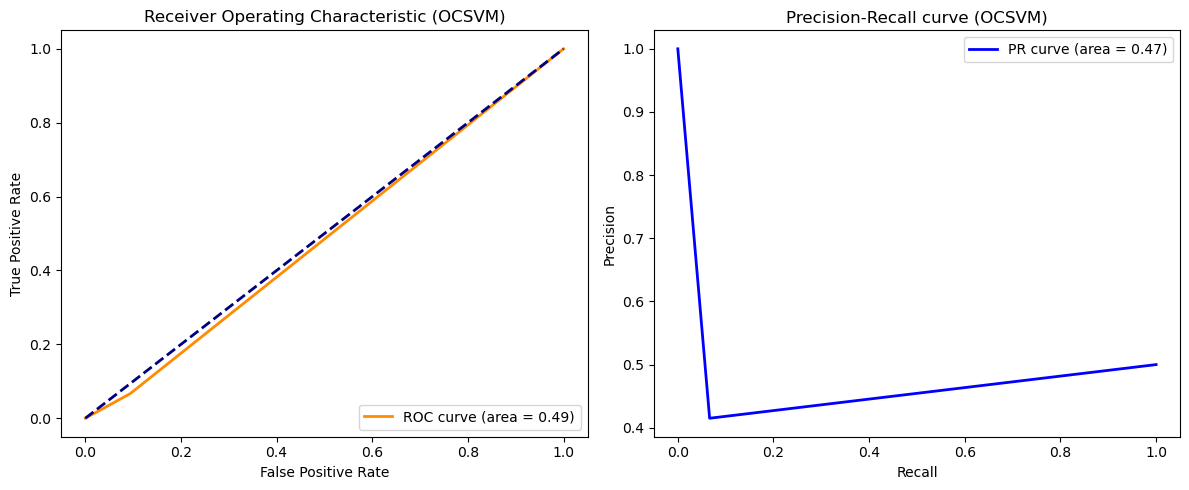

              precision    recall  f1-score   support

           0       0.49      0.91      0.64     28432
           1       0.42      0.07      0.11     28432

    accuracy                           0.49     56864
   macro avg       0.45      0.49      0.38     56864
weighted avg       0.45      0.49      0.38     56864



In [197]:
# Convert predictions to binary format (1 for normal, -1 for anomaly)
y_pred = (y_pred == -1).astype(int)

evaluation_method(y_test, y_pred)

#### without fitting

In [110]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor

# Set the parameters for LOF
n_neighbors = 25  # Adjust based on your dataset
contamination_rate = 0.5  # A very low contamination rate

# Initialize the LOF model
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination_rate)

# Fit the model on the training data (for learning "normal" data characteristics)
# lof.fit(X_train_scaled)

Evaluation Metrics for k=2:
Precision: 0.3498171074845245
Recall: 0.3498171074845245
F1-Score: 0.3498171074845245
AUC-ROC: 0.34981710748452444


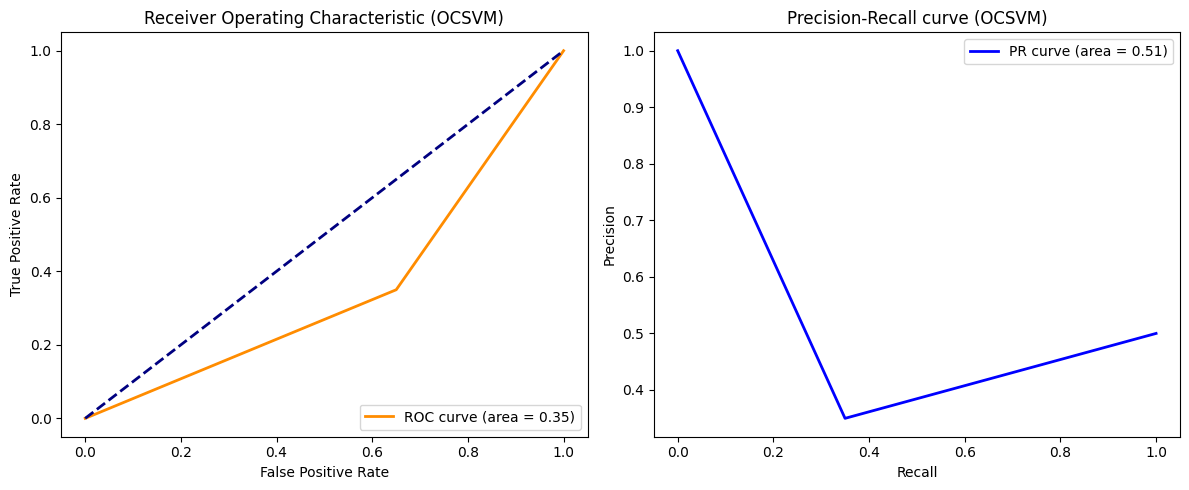

              precision    recall  f1-score   support

           0       0.35      0.35      0.35     28432
           1       0.35      0.35      0.35     28432

    accuracy                           0.35     56864
   macro avg       0.35      0.35      0.35     56864
weighted avg       0.35      0.35      0.35     56864



In [111]:
# Predict anomalies on the test data
y_pred = lof.fit_predict(X_test)

# Convert predictions to binary format (1 for normal, -1 for anomaly)
y_pred = (y_pred == -1).astype(int)

evaluation_method(y_test, y_pred)

### Isolation Forest (82% F1-score)

<span style="font-size: 150%; color:green">pretty good out of the box method</span>

Isolation Forest (iForest) is an effective anomaly detection method, particularly suitable for high-dimensional datasets. Its fundamental principle is different from most anomaly detection algorithms. Instead of trying to build a model of normal instances, iForest isolates anomalies.

1. Random Forest Structure: The algorithm builds an ensemble of decision trees (a random forest). Each tree is grown randomly.

2. Isolation of Points: In each tree, a random feature is selected, and then a split value is randomly chosen within the range of that feature. This process isolates points in the dataset, and the idea is that anomalies are easier to isolate than normal points.

3. Path Lengths to Isolation: The number of splits required to isolate a sample is recorded. Anomalies, being few and different, generally have shorter path lengths in the trees, whereas normal points have longer paths.

4. Anomaly Score: After the forest is built, the path length of data points in the trees is averaged and normalized to produce an anomaly score. Shorter paths indicate higher likelihood of being anomalies.

Key Hyperparameters:

- n_estimators: The number of trees in the forest. More trees increase the model's robustness but also the computation time.

- max_samples: The number of samples to draw from the dataset to train each tree. It can be a fraction of the total dataset or a fixed number.

- contamination: The proportion of outliers expected in the dataset. It affects the threshold for scoring anomalies.

- max_features: The number of features to draw from the dataset to train each tree.

- random_state: Controls the randomness of the forest creation for reproducibility.

In [112]:
from sklearn.ensemble import IsolationForest

In [118]:
# code snippet
from sklearn.ensemble import IsolationForest
X = [[-1.1], [0.3], [0.5], [100]]
clf = IsolationForest(random_state=0).fit(X)
clf.predict([[0.1], [0], [90]])

array([ 1,  1, -1])

In [113]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

# Define Isolation Forest parameters
n_estimators = 100  # Number of trees in the forest
max_samples = 'auto'  # Number of samples to draw to train each tree
contamination = 0.05  # Proportion of outliers in the dataset

# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=n_estimators, max_samples=max_samples, 
                             contamination=contamination, random_state=RANDOM_SEED)

# Fit the model on the training data and predict on the test data
iso_forest.fit(X_train)

IsolationForest(contamination=0.05, random_state=0)

Evaluation Metrics for k=2:
Precision: 0.9308042057402671
Recall: 0.6912281935846933
F1-Score: 0.7933233762564081
AUC-ROC: 0.8199212155317952


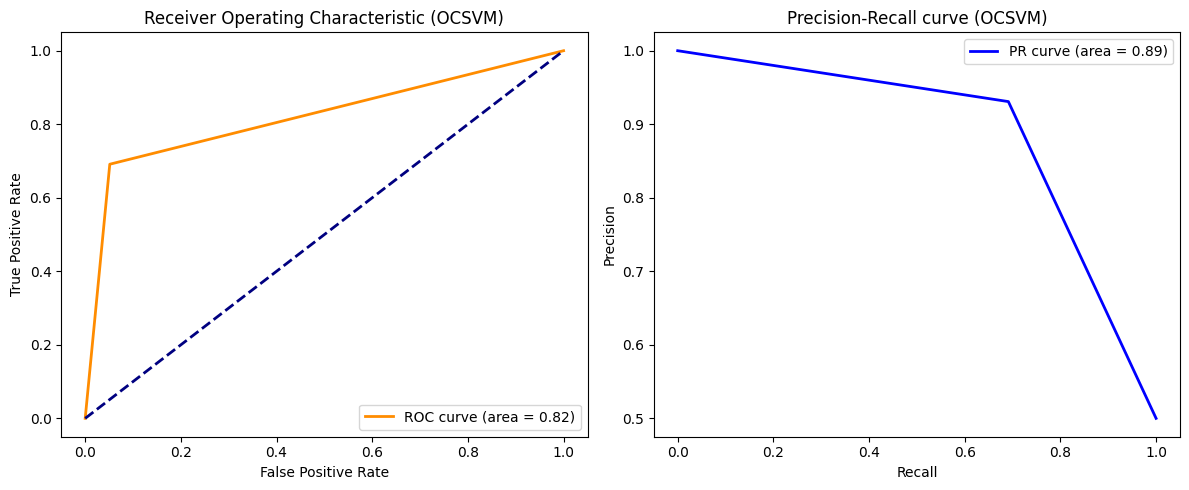

              precision    recall  f1-score   support

           0       0.75      0.95      0.84     28432
           1       0.93      0.69      0.79     28432

    accuracy                           0.82     56864
   macro avg       0.84      0.82      0.82     56864
weighted avg       0.84      0.82      0.82     56864



In [114]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

y_pred = iso_forest.predict(X_test)

# Convert predictions to binary format (1 for normal, -1 for anomaly)
y_pred = (y_pred == -1).astype(int)

evaluation_method(y_test, y_pred)

# Complex models
Ideas:
- Autoencoder
- Ensemble models: IForest and LODA
- Variational Autoencoder (VAE)

### Using Autoencoders for anomaly detection

Idea:     
1. Train the autoencoder using your prepared dataset. The model learns to encode and decode the normal data, minimizing the reconstruction error.
2. After training, use the autoencoder to reconstruct unseen data.
3. Calculate the reconstruction error for each instance. For normal data, the error should be relatively low, as the autoencoder has learned to reconstruct it well.
4. For anomalies (which the autoencoder hasn't seen during training), the reconstruction error will likely be higher, as these don't conform to the "normal" patterns the model has learned.
5. Define a threshold for the reconstruction error to classify a data point as normal or anomalous. This threshold can be set based on various methods, like a fixed value, a certain percentile based on the training data, or through cross-validation.

# Autoencoder
<span style="font-size: 150%; color:green">best result so far (88% F1-score)</span>

In [3]:
from sklearn.model_selection import train_test_split
import tqdm

# train // validate - no labels since they're all clean anyway
X_train_, X_validate_ = train_test_split(X_train, 
                                       test_size=VALIDATE_SIZE, 
                                       random_state=RANDOM_SEED)

NameError: name 'X_train' is not defined

In [ ]:
X_train_.shape

In [124]:
X_validate_.shape

(51177, 29)

### data is already normalized

In [ ]:
X_train_transformed = X_train_
X_validate_transformed = X_validate_
X_test_transformed = X_test

### model architecture

In [221]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
            nn.Linear(4, 2),
            nn.ELU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ELU(),
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Parameters
input_dim = X_train_transformed.shape[1]
batch_size = 256
epochs = 100

# Create the model
autoencoder = Autoencoder(input_dim)

# Define optimizer and loss function
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()

# using GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoder = autoencoder.to(device)

In [222]:
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train_transformed)

# Create a dataset and data loader
train_dataset = TensorDataset(X_train_tensor, X_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Convert validation data to PyTorch tensors
X_val_tensor = torch.Tensor(X_validate_transformed)

# Create a dataset and data loader for validation
val_dataset = TensorDataset(X_val_tensor, X_val_tensor)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size)

In [225]:
# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement before stopping
min_delta = 0.001  # Minimum change to qualify as an improvement
best_loss = float('inf')
counter = 0

In [2]:
for epoch in range(epochs):
    # Training
    autoencoder.train()
    for data in train_loader:
        inputs, targets = data
        inputs, targets = inputs.to(device), targets.to(device)  # Move data to the same device as the model
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Validation
    autoencoder.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, targets = data
            inputs, targets = inputs.to(device), targets.to(device)  # Move data to the same device as the model
            outputs = autoencoder(inputs)
            val_loss += criterion(outputs, targets).item()

    val_loss /= len(val_loader)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.8f}, Val Loss: {val_loss:.8f}')

    # Check for improvement for early stopping
    if best_loss - val_loss > min_delta:
        best_loss = val_loss
        counter = 0
        # Save the best model
        torch.save(autoencoder.state_dict(), 'best_autoencoder.pth')
    else:
        counter += 1

    if counter >= patience:
        print(f'Early stopping triggered after {epoch + 1} epochs')
        break

NameError: name 'epochs' is not defined

In [189]:
# transform the test set with the pipeline fitted to the training set
X_test_transformed = normalizer.transform(X_test)
X_test_transformed = min_max_scaler.transform(X_test_transformed)

In [268]:
# Convert the transformed test set to a PyTorch tensor
X_test_tensor = torch.Tensor(X_test_transformed).to(device)

In [269]:
# Get the model's reconstruction of the test set
autoencoder.eval()
with torch.no_grad():
    reconstructions = autoencoder(X_test_tensor).cpu().numpy()

In [271]:
# Calculate the MSE reconstruction loss per row
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

In [299]:
X_test_transformed.shape

(56864, 29)

In [300]:
clean = mse[y_test == 0]
fraud = mse[y_test == 1]

<Axes: >

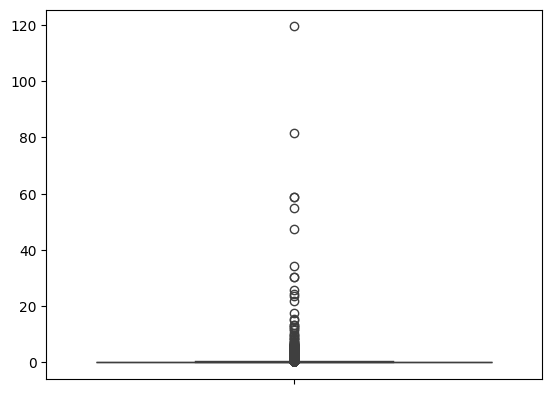

In [301]:
sns.boxplot(clean)

<Axes: >

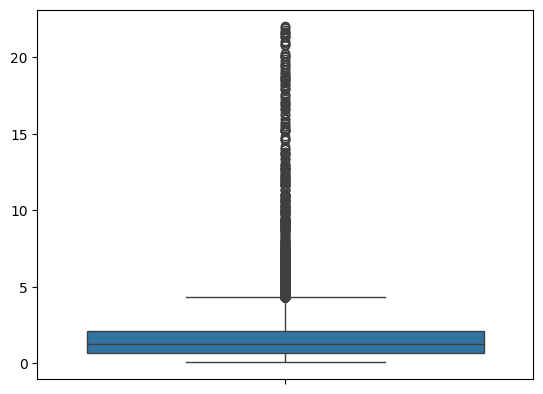

In [303]:
sns.boxplot(fraud)

In [279]:
np.mean(clean)

0.31684658855807024

In [280]:
np.mean(fraud)

1.902540424546424

In [281]:
np.median(clean)

0.21043773868598104

In [282]:
np.mean(fraud)

1.902540424546424

#### if you take just clean or fraud then there are samples very hard out of distriubtion --> plot is not nice

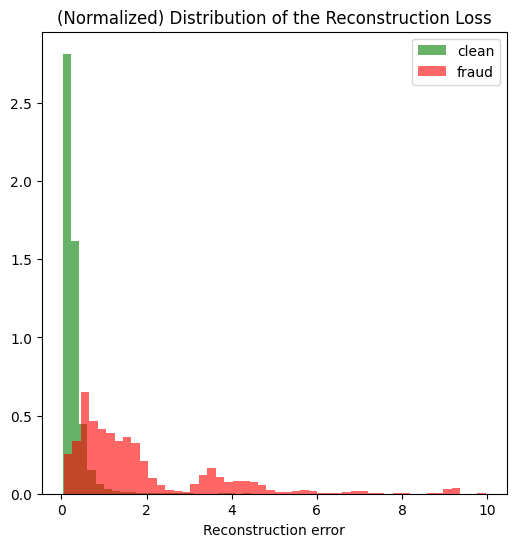

In [307]:
# Plotting the distribution of reconstruction loss
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(clean[clean <= 10], bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud[fraud <= 10], bins=50, density=True, label="fraud", alpha=.6, color="red")
plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.xlabel("Reconstruction error")
plt.legend()
plt.show()

C:\Users\Hasan\AppData\Local\Temp\ipykernel_3080\4256407918.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clean[clean <= 10], bins = 50, label = 'Normal')
C:\Users\Hasan\AppData\Local\Temp\ipykernel_3080\4256407918.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud[fraud <= 10], bin

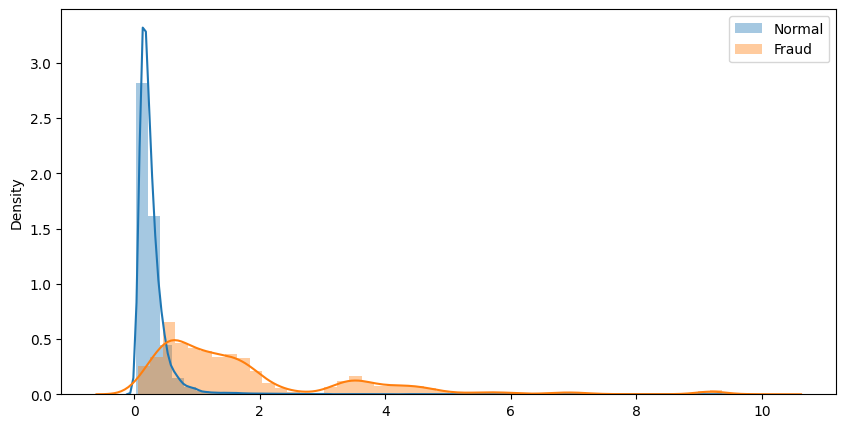

In [308]:
plt.figure(figsize = (10,5))
sns.distplot(clean[clean <= 10], bins=50, label = 'Normal')
sns.distplot(fraud[fraud <= 10], bins=50, label = 'Fraud')
plt.legend()
plt.show()

In [321]:
import numpy as np

# Assuming 'clean' and 'fraud' are the arrays containing your MSE values

# Define the number of bins
num_bins = 50

# Calculate histograms
clean_counts, clean_bins = np.histogram(clean[clean <= 10], bins=num_bins)
fraud_counts, fraud_bins = np.histogram(fraud[fraud <= 10], bins=num_bins)

# Find the bin with the most elements for clean data
max_clean_bin_index = np.argmax(clean_counts)
max_clean_bin_range = (clean_bins[max_clean_bin_index], clean_bins[max_clean_bin_index + 1])

# Find the bin with the most elements for fraud data
max_fraud_bin_index = np.argmax(fraud_counts)
max_fraud_bin_range = (fraud_bins[max_fraud_bin_index], fraud_bins[max_fraud_bin_index + 1])

print("Max clean bin range:", max_clean_bin_range)
print("Max fraud bin range:", max_fraud_bin_range)

Max clean bin range: (0.03269997188080034, 0.22488165370637317)
Max fraud bin range: (0.45583386444448815, 0.6539298728048348)


In [319]:
fraud_counts

array([1433, 1884, 3645, 2607, 2329, 2185, 1885, 2037, 1817, 1181,  576,
        318,  129,   81,   72,  359,  685,  911,  599,  417,  452,  470,
        425,  305,  143,   69,   55,   98,  117,  102,   43,   13,   27,
         75,  109,  112,   18,   12,    6,    9,    9,    3,    4,    8,
          9,  182,  198,    5,    5,    8], dtype=int64)

In [320]:
clean_counts

array([15376,  8815,  2441,   823,   350,   151,    79,    70,    60,
          37,    32,    21,    17,    18,    13,    17,     5,     7,
           6,     8,    11,     0,     8,     6,     2,     2,     1,
           6,     3,     2,     3,     2,     3,     1,     2,     1,
           0,     2,     1,     0,     0,     0,     1,     1,     2,
           0,     0,     0,     1,     2], dtype=int64)

### setting a threshold via histogram looking 
**precision / recall** tradeoff
- when setting the threshold higher --> higher precision
- when setting the threshold lower --> higher recall

In [357]:
threshold = max_fraud_bin_range[0]
threshold

0.45583386444448815

In [358]:
outliers = mse > threshold
len(outliers)

56864

In [359]:
print("Number of outliers: ", sum(outliers))

Number of outliers:  28585


In [360]:
y_pred_test = outliers
# Convert predictions to match y_test labels (1 for anomalies, 0 for normal)
y_pred_test = y_pred_test.astype(int)

In [361]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Evaluate method 
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1_score = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

# Print evaluation metrics 
print("Evaluation Metrics for k=2:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")
print(f"AUC-ROC: {roc_auc}")

Evaluation Metrics for k=2:
Precision: 0.8786076613608536
Recall: 0.8833356781091728
F1-Score: 0.880965326130803
AUC-ROC: 0.8806450478334271


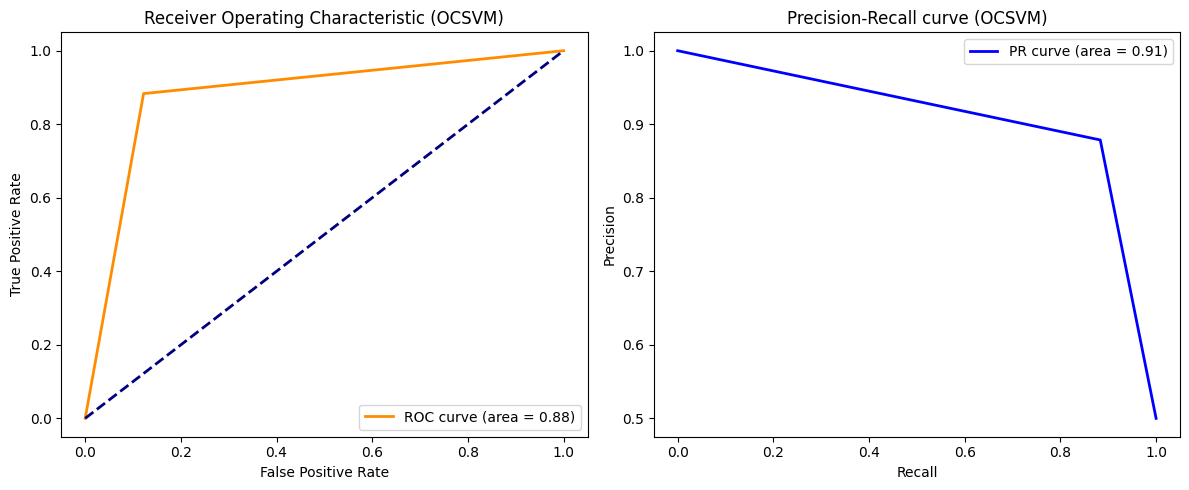

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     28432
           1       0.88      0.88      0.88     28432

    accuracy                           0.88     56864
   macro avg       0.88      0.88      0.88     56864
weighted avg       0.88      0.88      0.88     56864



In [362]:
from sklearn.metrics import (
    f1_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    precision_recall_curve,
    r2_score,
    roc_auc_score,
    classification_report,
    roc_curve, 
    auc
)


# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)
pr_auc = auc(recall, precision)

# Generate a classification report
class_report = classification_report(y_test, y_pred_test)

# Plotting the ROC and Precision-Recall Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (OCSVM)')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (OCSVM)')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

print(class_report)

### more robust threshold determination method (MAD)

In [363]:
a = np.mean(fraud)
m = np.median(mse)
ad = np.abs(a - m)
mad = np.median(ad)
res = 0.6745 * ad / mad
res

0.6745

In [364]:
def mad_score(points):
    m = np.median(points)
    ad = np.abs(points - m)
    mad = np.median(ad)
    return 0.6745 * ad / mad

z_scores = mad_score(mse)

In [377]:
threshold = 0.7  # Set meaningful threshold
outliers = z_scores > threshold

In [378]:
print("Number of outliers: ", np.sum(outliers))

Number of outliers:  26765


In [379]:
outliers

array([False, False,  True, ..., False, False,  True])

In [380]:
y_pred_test = outliers
# Convert predictions to match y_test labels (1 for anomalies, 0 for normal)
y_pred_test = y_pred_test.astype(int)

In [381]:
y_pred_test

array([0, 0, 1, ..., 0, 0, 1])

In [382]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Evaluate method 
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1_score = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

# Print evaluation metrics 
print("Evaluation Metrics for k=2:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")
print(f"AUC-ROC: {roc_auc}")

Evaluation Metrics for k=2:
Precision: 0.7430599663739959
Recall: 0.6994935284186832
F1-Score: 0.7206188742141784
AUC-ROC: 0.7288090883511537


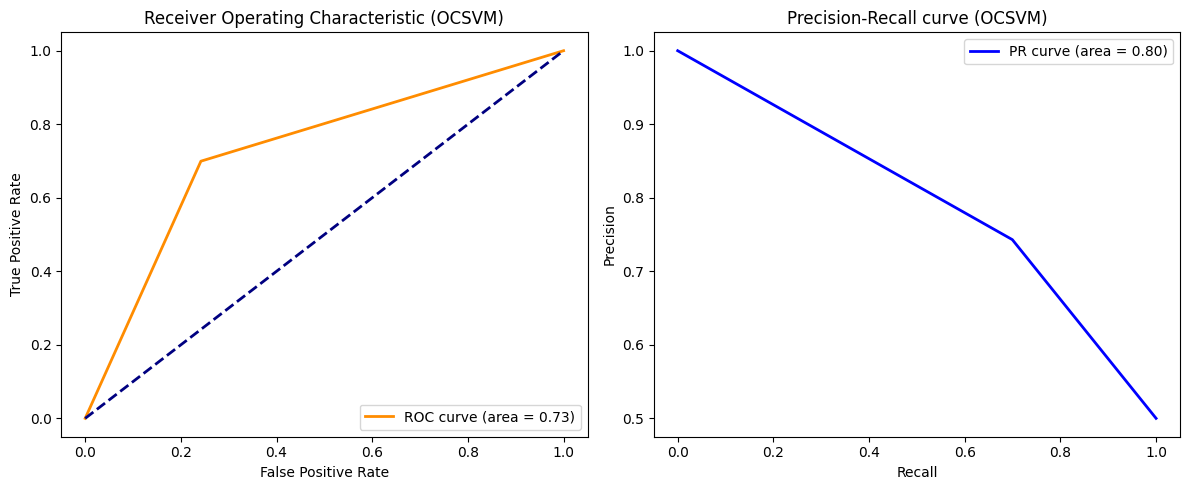

              precision    recall  f1-score   support

           0       0.72      0.76      0.74     28432
           1       0.74      0.70      0.72     28432

    accuracy                           0.73     56864
   macro avg       0.73      0.73      0.73     56864
weighted avg       0.73      0.73      0.73     56864



In [383]:
from sklearn.metrics import (
    f1_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    precision_recall_curve,
    r2_score,
    roc_auc_score,
    classification_report,
    roc_curve, 
    auc
)


# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)
pr_auc = auc(recall, precision)

# Generate a classification report
class_report = classification_report(y_test, y_pred_test)

# Plotting the ROC and Precision-Recall Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (OCSVM)')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (OCSVM)')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

print(class_report)

# Appendix

## Comparison to the original data from the website

Dataset from the website https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/

<span style="font-size: 150%; color:orange">I think our supervisor only took a subset of the data due to computation resources because its not the same as provided in his repo</span> 

Also there is another credit card fraud dataset not to confuse with our dataset (other dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

In [3]:
df = pd.read_csv('../../original_data/creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
df.shape

(568630, 31)

In [5]:
df[df["Class"] == 0].shape

(284315, 31)

In [6]:
df[df["Class"] == 1].shape

(284315, 31)